# Практические занятия №6-7

## 1. Модули

**1.1.** (0.1 балла)

Напишите код, состоящий из двух модулей, для получения следующего сообщения об ошибке:

```
AttributeError: partially initialized module '...' has no attribute '...' (most likely due to a circular import)
```

ImportError: cannot import name 'test' from 'test' (C:\Users\kallk\AppData\Local\Programs\Python\Python311\Lib\test\__init__.py)

**1.2.** (0.1 балла)

Как вы думаете, модуль загружается один раз или же загружается каждый раз при очередном импорте? Докажите правильность вашей гипотезы примером кода.

**1.3.** (0.2 балла)

Предположим, мы хотим изменить значение глобальной переменной модуля, но так, чтобы новое значение отразилось на всех пользователях этого модуля. К чему приведет следующий код? Что можно предложить взамен?

```Python
from some_module import GLOBAL_VAR
GLOBAL_VAR = 42
```

**1.4.** (0.3 балла)

Промежуточное задание. Решить задачу №10 из [ЦАП](https://kispython.ru/) в соответствии со своим вариантом.

**1.5.** (0.3 балла)

На основе задачи 1.4. создайте учебный пакет (см. [лекцию №3](https://github.com/true-grue/kispython/blob/main/lect3.ipynb)), состоящий из двух модулей mealy_main.py, mealy_test.py, а также [конфигурационного файла](https://www.awesomeandrew.ru/2021/03/03/%D0%BE%D1%82-%D0%BD%D0%BE%D0%B2%D0%B8%D1%87%D0%BA%D0%B0-%D0%B2-%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D1%82%D1%8B-%D0%BF%D0%B8%D1%88%D0%B5%D0%BC-%D1%84%D0%B0%D0%B9%D0%BB-%D0%BA%D0%BE%D0%BD%D1%84%D0%B8/?ysclid=lffa1gl7si102718322) с любым типом расширения (например, `.ini` или `.json`).

**1.6.** (0.4 балла) Получите дистрибутив, готовый для установки с помощью pip (см. [ссылку](https://proglib.io/p/kak-opublikovat-svoyu-python-biblioteku-na-pypi-2020-01-28?ysclid=lffm1w28cq136077361)). Проверьте результат установки в виртуальном окружении.

**Все дальнейшие задачи делаются в Jupyter-блокноте с использованием библиотеки [Matplotlib](https://matplotlib.org/stable/users/index.html). Также при желании можно воспользоваться библиотекой [Seaborn](https://seaborn.pydata.org/).**

## 2. Введение в построение графиков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

Проанализируйте [базу данных](https://github.com/Newbilius/Old-Games_DOS_Game_Gauntlet/blob/master/GAMES.csv) старых компьютерных игр.

С помощью [графиков](https://pythonru.com/biblioteki/tipy-grafikov-v-matplotlib-plt3?ysclid=lffg70iq2w802225011) (могут понадобиться линейный график, гистограмма или столбчатая диаграмма) ответьте на следующие вопросы:

**2.1.** (0.3 балла)

Какие годы были самыми популярными с точки зрения выхода игр?

**2.2.** (0.3 балла)

Какие жанры были популярны в различные периоды времени?

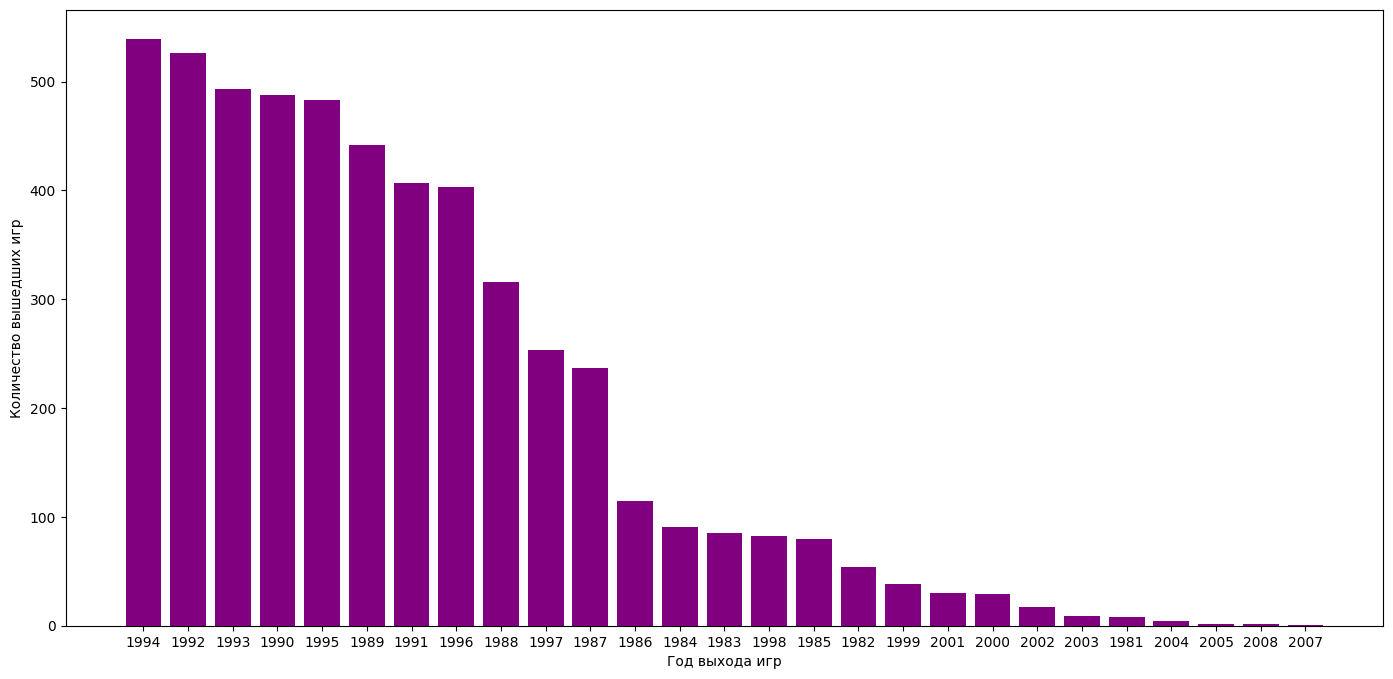

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/Newbilius/Old-Games_DOS_Game_Gauntlet/master/GAMES.csv",
                 names=["Title", "Genre", "URL", "Year"], sep=";")

years = df["Year"][df["Year"] != 'не издана']
games_by_year = years.value_counts()

plt.figure(figsize=(17, 8))
plt.bar(games_by_year.index, games_by_year, color ='purple')
plt.ylabel("Количество вышедших игр")
plt.xlabel("Год выхода игр")
plt.show()

<Figure size 2500x1500 with 0 Axes>

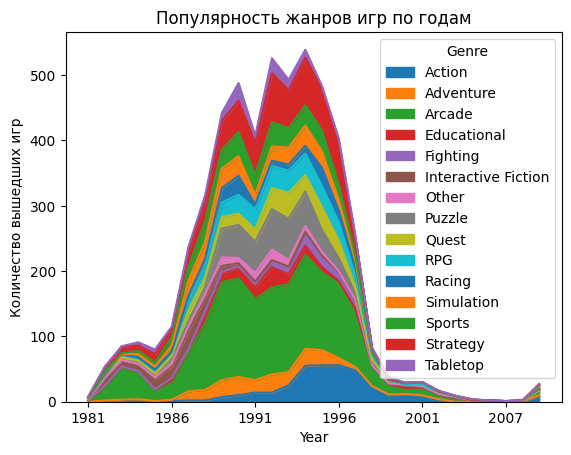

In [6]:
grouped = df.groupby(['Year', 'Genre'])['Title'].count().reset_index(name='Count')
pivot = grouped.pivot(index='Year', columns='Genre', values='Count').fillna(0)

plt.figure(figsize=(25, 15))
pivot.plot.area()
plt.ylabel('Количество вышедших игр')
plt.title('Популярность жанров игр по годам')
plt.show()

## 3. Процедурная графика

**3.1.** (0.2 балла)

Создайте генератор случайных спрайтов 5x5 пикселей. Используйте свойство симметрии. Вывод реализуйте с помощью функции imshow.

Пример работы генератора показан ниже.

![](https://github.com/true-grue/kispython/blob/main/data/sprite1.png?raw=1)

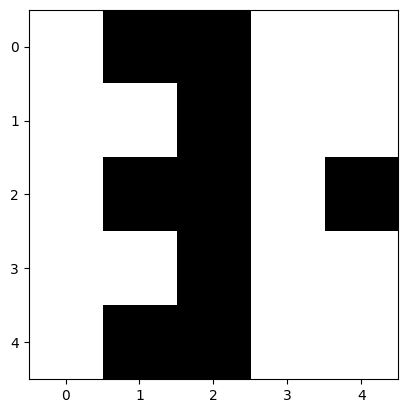

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

# x = 5
# r = 1
# n = 1
# m = 1

# a = np.zeros(x*x*n*m).reshape(x*n, x*m)
# for u in range(n):
#     for v in range(m):
#         for i in range(x-2*r):
#             for j in range(x-2*r):
#                 a[u*x+i+r][v*x+j+r] = randint(0,1)
#                 a[u*x+i+r][v*x+(x-r)-j-1] = a[u*x+i+r][v*x+j+r]

# plt.imshow(a,cmap='Greys')
# plt.show()

sprite = np.random.randint(0, 2, size=(5, 5))
sprite = np.maximum(sprite, sprite[::-1])
plt.imshow(sprite, cmap='gray')
plt.show()

**3.2.** (0.3 балла)

Создайте генератор карт спрайтов. Пример работы этого генератора показан ниже.


![](https://github.com/true-grue/kispython/blob/main/data/sprite2.png?raw=1)

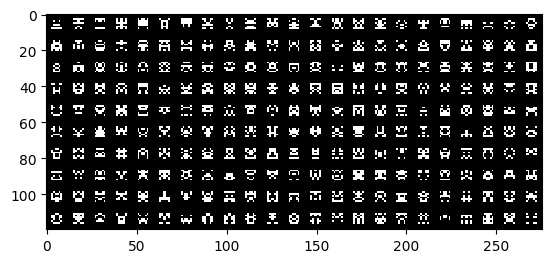

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint, choice

x = 12
r = 3
n = 10
m = 23


a = np.zeros(x*x*n*m*3).reshape(x*n, x*m, 3)
for u in range(n):
    for v in range(m):
        for i in range(x-2*r):
            for j in range(x-2*r):
                a[u*x+i+r][v*x+j+r] = [randint(0,1)] * 3
                a[u*x+i+r][v*x+(x-r)-j-1] = a[u*x+i+r][v*x+j+r]

plt.imshow(a, cmap='gray', interpolation='none')
plt.show()

**3.3.** (0.5 балла)

Реализуйте генератор случайных спрайтов NxM. Используйте различные свойства симметрии. Добавьте цвета.

Пример работы этого генератора показан ниже.


![](https://github.com/true-grue/kispython/blob/main/data/sprite3.png?raw=1)

Использовалась палитра из PICO-8:

```
1D2B53
7E2553
008751
AB5236
5F574F
C2C3C7
FFF1E8
FF004D
FFA300
FFEC27
00E436
29ADFF
83769C
FF77A8
FFCCAA
```

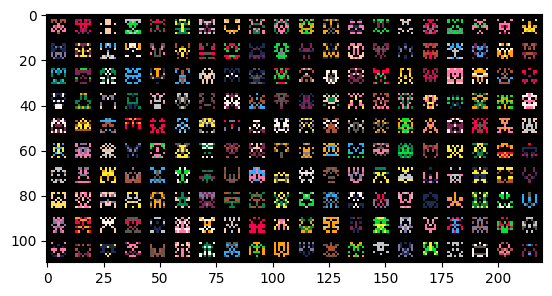

In [53]:
palette = [0x1D2B53, 0x7E2553, 0x008751, 0xAB5236, 0x5F574F, 0xC2C3C7, 0xFFF1E8, 0xFF004D,
           0xFFA300, 0xFFEC27, 0x00E436, 0x29ADFF, 0x83769C, 0xFF77A8, 0xFFCCAA]

hex_to_rgb = lambda hex_value: np.array([hex_value >> 16, (hex_value >> 8) & 0xFF, hex_value & 0xFF])


palette = np.array(list(map(hex_to_rgb, palette)))

x = 11
r = 2
n = 10
m = 20
    

a = np.zeros(x*x*n*m*3).reshape(x*n, x*m, 3)
for u in range(n):
    for v in range(m):
        colors = [choice(palette), choice(palette)]
        for i in range(x-2*r):
            for j in range(x-2*r):
                a[u*x+i+r][v*x+j+r] = randint(0, 1) * choice(colors)
                a[u*x+i+r][v*x+(x-r)-j-1] = a[u*x+i+r][v*x+j+r]

plt.imshow(a.astype('uint8'), interpolation="None")
plt.show()

**3.4.** (0.5 балла)

Слышали ли вы об играх с процедурно сгенерированными вселенными? Оказывается, у современной Elite Dangerous есть далекий предок – игра Elite 1984 года. В Elite была впечатляющая по тем временам 3d графика и целых 8 галактик для исследования, каждая из которых содержала 256 солнечных систем. Удивительно, но все это работало на 8-битном компьютере, а код игры составлял микроскопические 32 Кбайт.

Изобразите легендарную первую галактику из игры Elite. Для этого потребуется портировать алгоритм процедурной генерации, приведенный далее на C/C++. Обратите внимание, [этот код](http://www.iancgbell.clara.net/elite/text/) написан в низкоуровневом стиле, поскольку был получен из оригинальной игры, которая, в свою очередь, была написана на языке ассемблера. Вам необходимо при портировании следовать хорошему стилю написания программ на Питоне.

Каждая галактика в игре генерируется на основе всего трех 16-битных чисел w0, w1 и w2. Для первой галактики это 0x5A4A, 0x0248 и 0xB753. Имена звезд генерируются с помощью массива слогов.

```C
char pairs[] = "..LEXEGEZACEBISO"
"USESARMAINDIREA."
"ERATENBERALAVETI"
"EDORQUANTEISRION"; /* Dots should be nullprint characters */

typedef struct
{
 uint x;
 uint y; /* One byte unsigned */
 uint economy; /* These two are actually only 0-7 */
 uint govtype;
 uint techlev; /* 0-16 i think */
 uint population; /* One byte */
 uint productivity; /* Two byte */
 uint radius; /* Two byte (not used by game at all) */
 fastseedtype goatsoupseed;
 char name[12];
} plansys;

void tweakseed(seedtype *s)
{
 uint16 temp;
 temp = ((*s).w0) + ((*s).w1) + ((*s).w2); /* 2 byte aritmetic */
 (*s).w0 = (*s).w1;
 (*s).w1 = (*s).w2;
 (*s).w2 = temp;
}

/**-Generate system info from seed **/

plansys makesystem(seedtype *s)
{
 plansys thissys;
 uint pair1, pair2, pair3, pair4;
 uint16 longnameflag = ((*s).w0) & 64;

 thissys.x = (((*s).w1) >> 8);
 thissys.y = (((*s).w0) >> 8);

 thissys.govtype = ((((*s).w1) >> 3) & 7); /* bits 3,4 &5 of w1 */

 thissys.economy = ((((*s).w0) >> 8) & 7); /* bits 8,9 &A of w0 */
 if (thissys.govtype <= 1)
 {
 thissys.economy = ((thissys.economy) | 2);
 }

 thissys.techlev = ((((*s).w1) >> 8) & 3) + ((thissys.economy) ^ 7);
 thissys.techlev += ((thissys.govtype) >> 1);
 if (((thissys.govtype) & 1) == 1) thissys.techlev += 1;
 /* C simulation of 6502's LSR then ADC */

 thissys.population = 4 * (thissys.techlev) + (thissys.economy);
 thissys.population += (thissys.govtype) + 1;

 thissys.productivity = (((thissys.economy) ^ 7) + 3)*((thissys.govtype) + 4);
 thissys.productivity *= (thissys.population) * 8;

 thissys.radius = 256 * (((((*s).w2) >> 8) & 15) + 11) + thissys.x;

 thissys.goatsoupseed.a = (*s).w1 & 0xFF;;
 thissys.goatsoupseed.b = (*s).w1 >> 8;
 thissys.goatsoupseed.c = (*s).w2 & 0xFF;
 thissys.goatsoupseed.d = (*s).w2 >> 8;

 pair1 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair2 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair3 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair4 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 /* Always four iterations of random number */

 (thissys.name)[0] = pairs[pair1];
 (thissys.name)[1] = pairs[pair1 + 1];
 (thissys.name)[2] = pairs[pair2];
 (thissys.name)[3] = pairs[pair2 + 1];
 (thissys.name)[4] = pairs[pair3];
 (thissys.name)[5] = pairs[pair3 + 1];

 if (longnameflag) /* bit 6 of ORIGINAL w0 flags a four-pair name */
 {
 (thissys.name)[6] = pairs[pair4];
 (thissys.name)[7] = pairs[pair4 + 1];
 (thissys.name)[8] = 0;
 }
 else (thissys.name)[6] = 0;
 stripout(thissys.name, '.');

 return thissys;
}
```

Описание первой галактики можно найти [здесь](https://wiki.alioth.net/index.php/Oolite_planet_list/Galaxy_1).

Ниже показан пример визуализации первой галактики.

![](https://github.com/true-grue/kispython/blob/main/data/galaxy.png?raw=1)

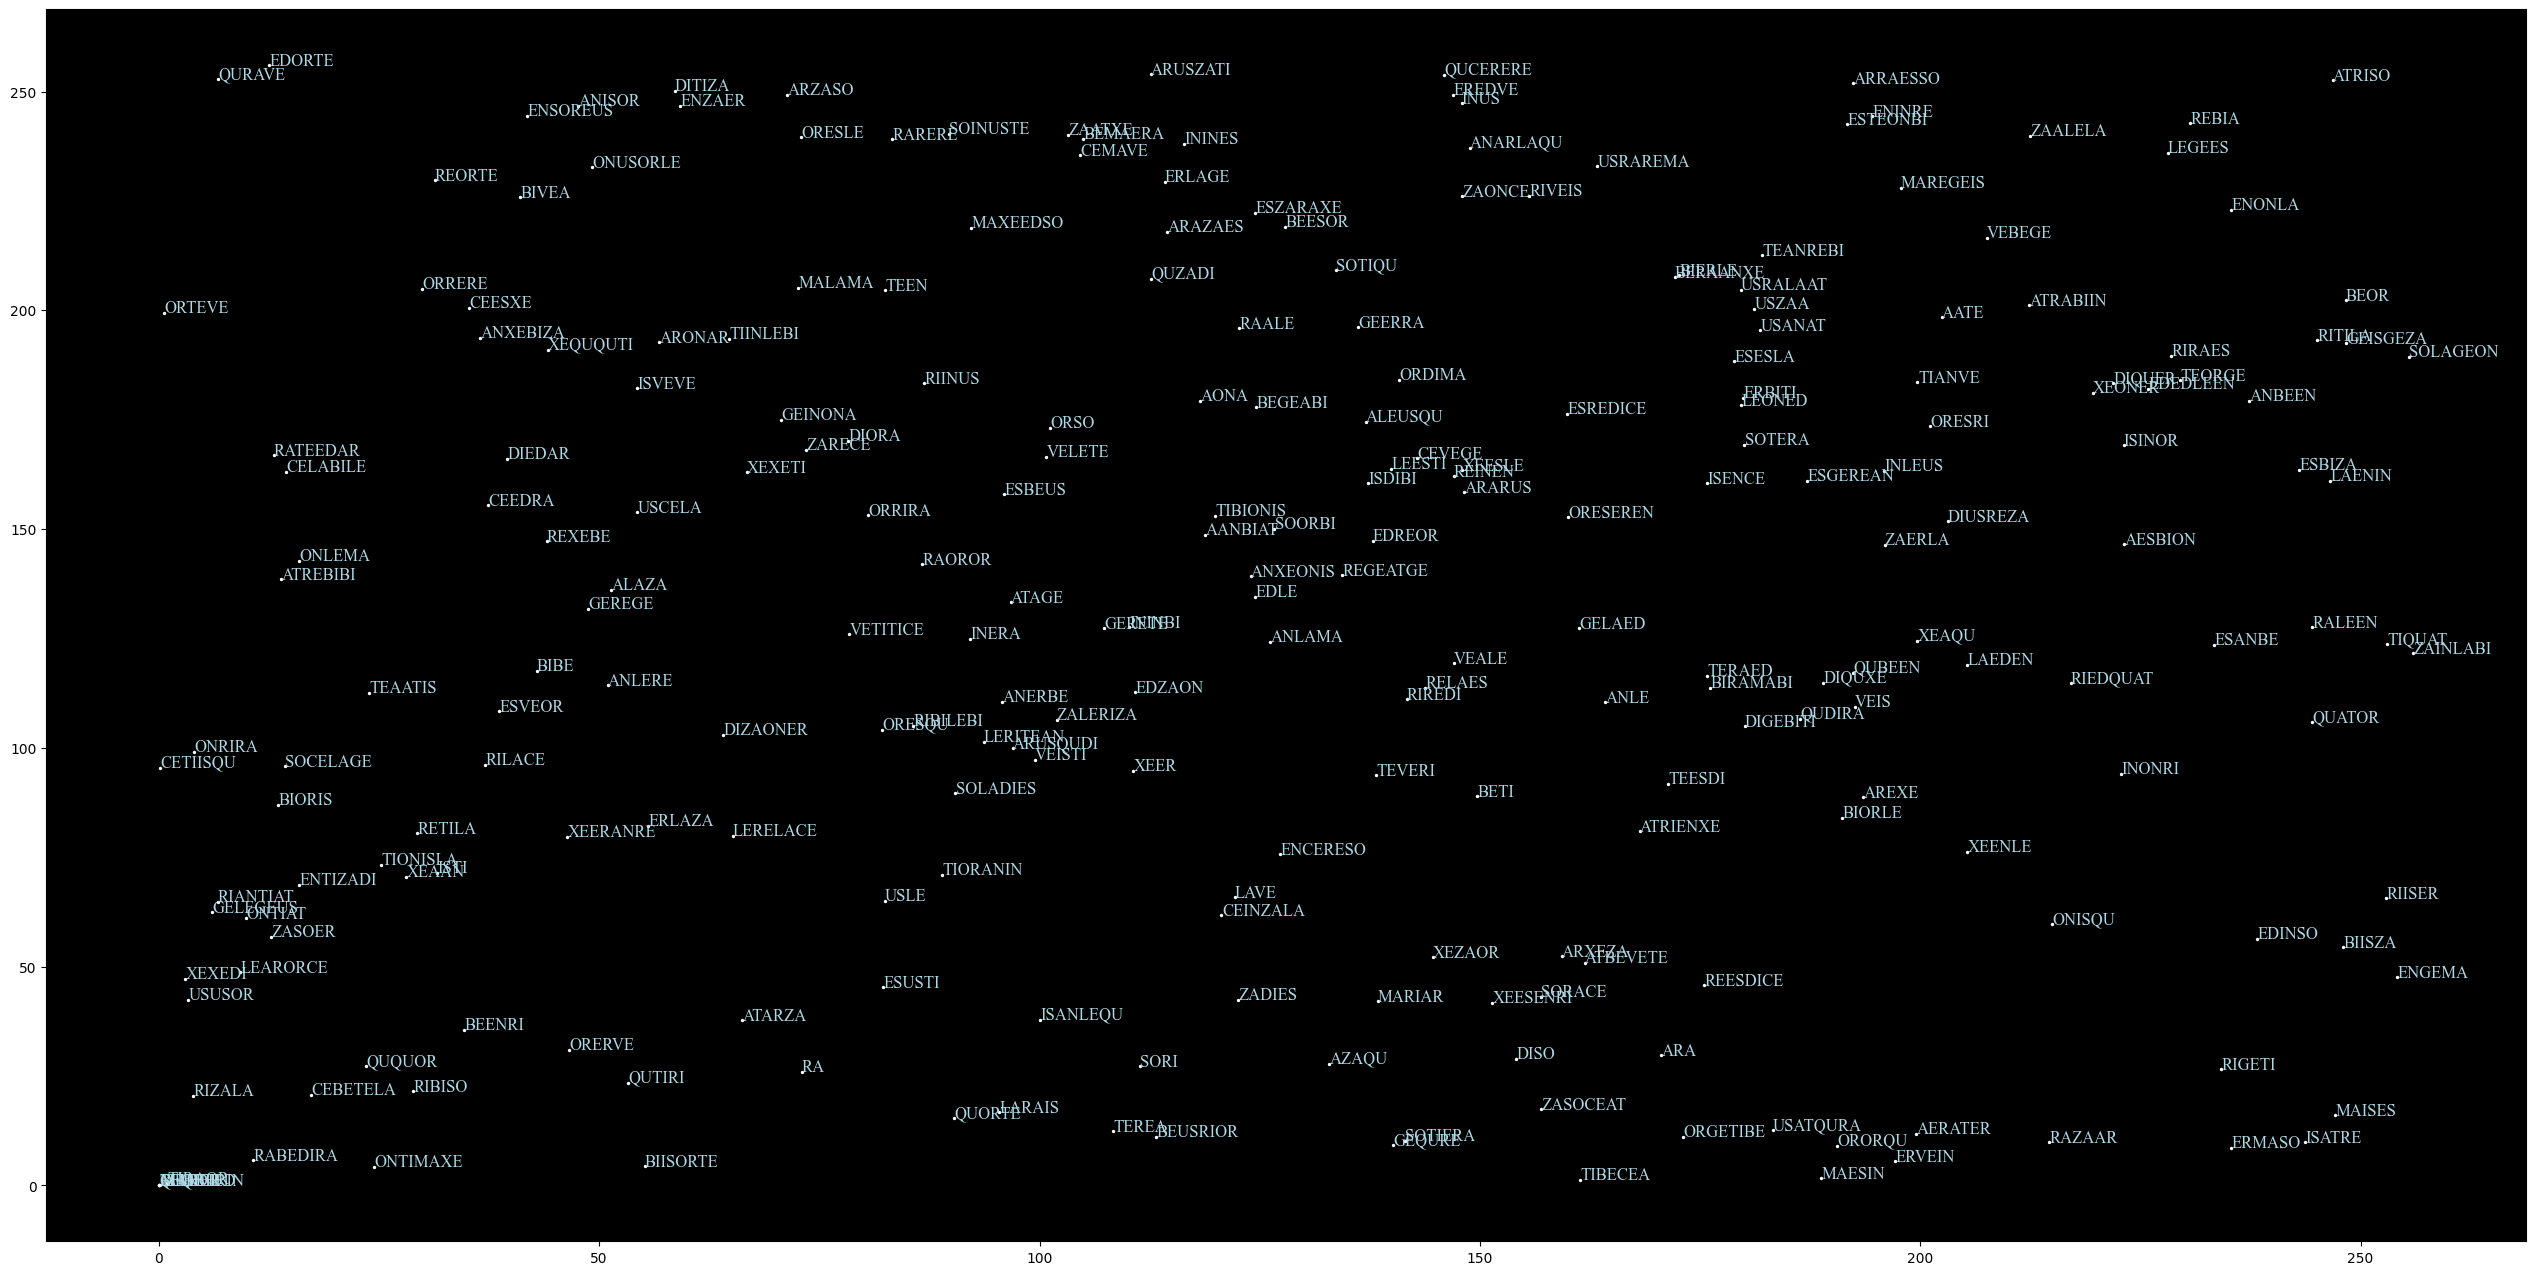

In [54]:
pairs = "..LEXEGEZACEBISO" \
        "USESARMAINDIREA." \
        "ERATENBERALAVETI" \
        "EDORQUANTEISRION"


class seed_type:
    def __init__(self, w0, w1, w2):
        self.w0 = w0
        self.w1 = w1
        self.w2 = w2


class fast_seed_type:
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d


class plan_sys:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.economy = 0
        self.govtype = 0
        self.techlev = 0
        self.population = 0
        self.productivity = 0
        self.radius = 0
        self.goatsoupseed = fast_seed_type(0, 0, 0, 0)
        self.name = ""


def tweak_seed(s):
    temp = s.w0 + s.w1 + s.w2
    s.w0 = s.w1
    s.w1 = s.w2
    s.w2 = temp
    
    
def makesystem(s):
    thissys = plan_sys()
    longnameflag = s.w0 & 64

    thissys.x = (s.w1 >> 8) % 2**32
    thissys.y = (s.w0 >> 8) % 2**32

    thissys.govtype = (s.w1 >> 3) & 7

    thissys.economy = (s.w0 >> 8) & 7
    if thissys.govtype <= 1:
        thissys.economy |= 2

    thissys.techlev = ((s.w1 >> 8) & 3) + (thissys.economy ^ 7)
    thissys.techlev += thissys.govtype >> 1
    if thissys.govtype & 1 == 1:
        thissys.techlev += 1

    thissys.population = 4 * thissys.techlev + thissys.economy
    thissys.population += thissys.govtype + 1

    thissys.productivity = (thissys.economy ^ 7 + 3) * (thissys.govtype + 4)
    thissys.productivity *= thissys.population * 8

    thissys.radius = 256 * (((s.w2 >> 8) & 15) + 11) + thissys.x

    thissys.goatsoupseed.a = s.w1 & 0xFF
    thissys.goatsoupseed.b = s.w1 >> 8
    thissys.goatsoupseed.c = s.w2 & 0xFF
    thissys.goatsoupseed.d = s.w2 >> 8

    pair1 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair2 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair3 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair4 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)

    thissys.name = pairs[pair1:pair1+2] + pairs[pair2:pair2+2] + pairs[pair3:pair3+2]
    if longnameflag:
        thissys.name += pairs[pair4:pair4+2]
    thissys.name = thissys.name.replace(".", "")

    return thissys


def normalize(values):
    min_value = min(values)
    max_value = max(values)
    normalized_values = [(v - min_value) / (max_value - min_value) for v in values]
    scaled_values = [(v * 256) for v in normalized_values]
    
    return scaled_values
    
    
seed = seed_type(0x5A4A, 0x0248, 0xB753)
systems = [makesystem(seed) for i in range(256)]
xs, ys = zip(*((system.x, system.y) for system in systems))
xs = normalize(xs)
ys = normalize(ys)
names = [system.name for system in systems]

fig, ax = plt.subplots()
fig.set_size_inches(32, 16) 
ax.scatter(xs, ys, color='white', s=2)
ax.set_facecolor("black")

for i, name in enumerate(names):
    ax.annotate(name, (xs[i], ys[i]),
                xytext=(xs[i]+0.05, ys[i]+0.05),
                color='lightblue',
                fontsize=12,
                fontname='Times New Roman')

plt.show()

## 4. Инфографика

Проанализируйте данные, полученные от ЦАП. Для этого можно воспользоваться приведенным ниже кодом.

```Python
import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# id, task, variant, group, time
mesages = load_csv('messages.csv')

# id, message_id, time, status
checks = load_csv('checks.csv')

# task, variant, group, time, status, achievements
statuses = load_csv('statuses.csv')

# О статусах см. https://github.com/kispython-ru/dta/blob/main/webapp/models.py#L44-L50
```

In [3]:
import csv
import datetime
import ast


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


messages = pd.read_csv('messages.csv', names=["id", "Task", "Variant", "Group", "Time"])

messages["Time"] = messages["Time"].apply(parse_time)



checks = pd.read_csv('checks.csv', names=["id", "message_id", "Time", "Status"])
checks["Time"] = checks["Time"].apply(parse_time)


statuses = pd.read_csv('statuses.csv', names=["Task", "Variant", "Group", "Time", "Status", "Achievements"])
statuses["Time"] = statuses["Time"].apply(parse_time)
statuses["Achievements"] = statuses["Achievements"].apply(ast.literal_eval)

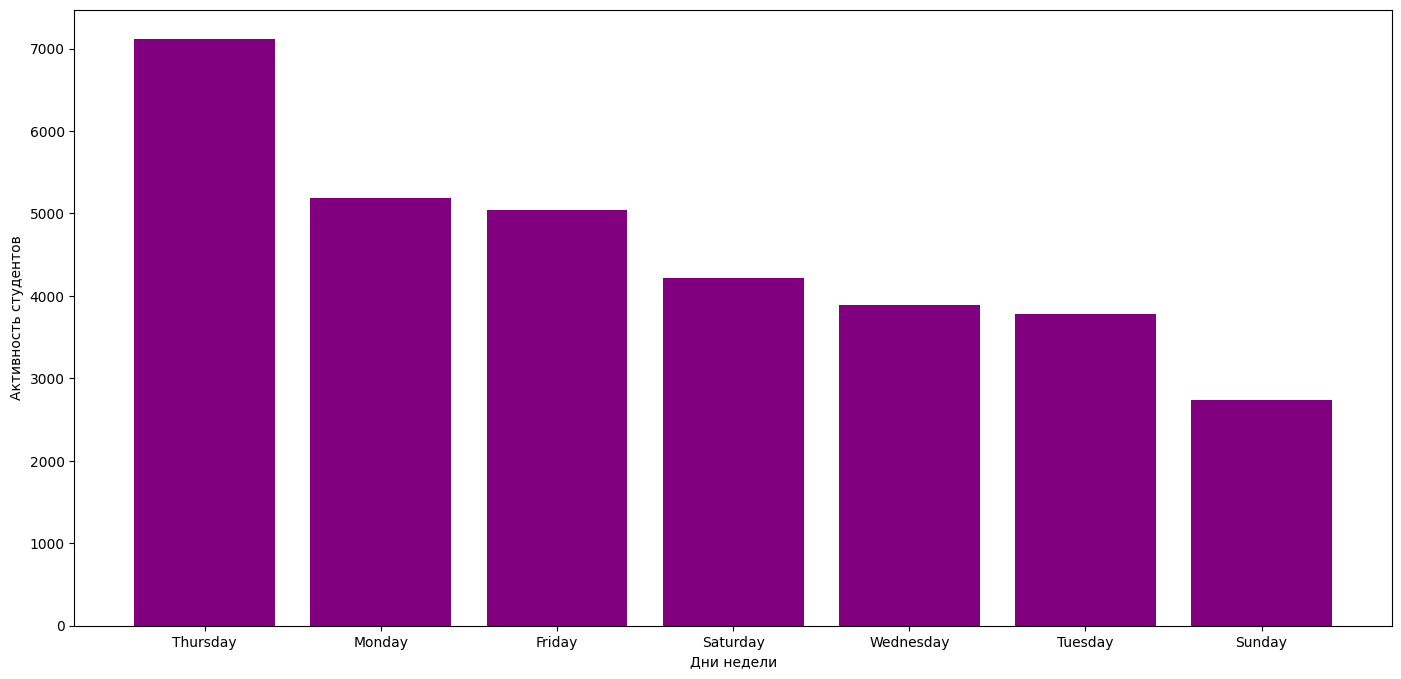

In [55]:
# 4.1
# Как по дням недели распределяется активность студентов?
data = checks["Time"]
data = data.apply(lambda x: x.strftime('%A'))
data = data.value_counts()

plt.figure(figsize=(17, 8))
plt.bar(data.index, data, color ='purple')
plt.ylabel("Активность студентов")
plt.xlabel("Дни недели")
plt.show()

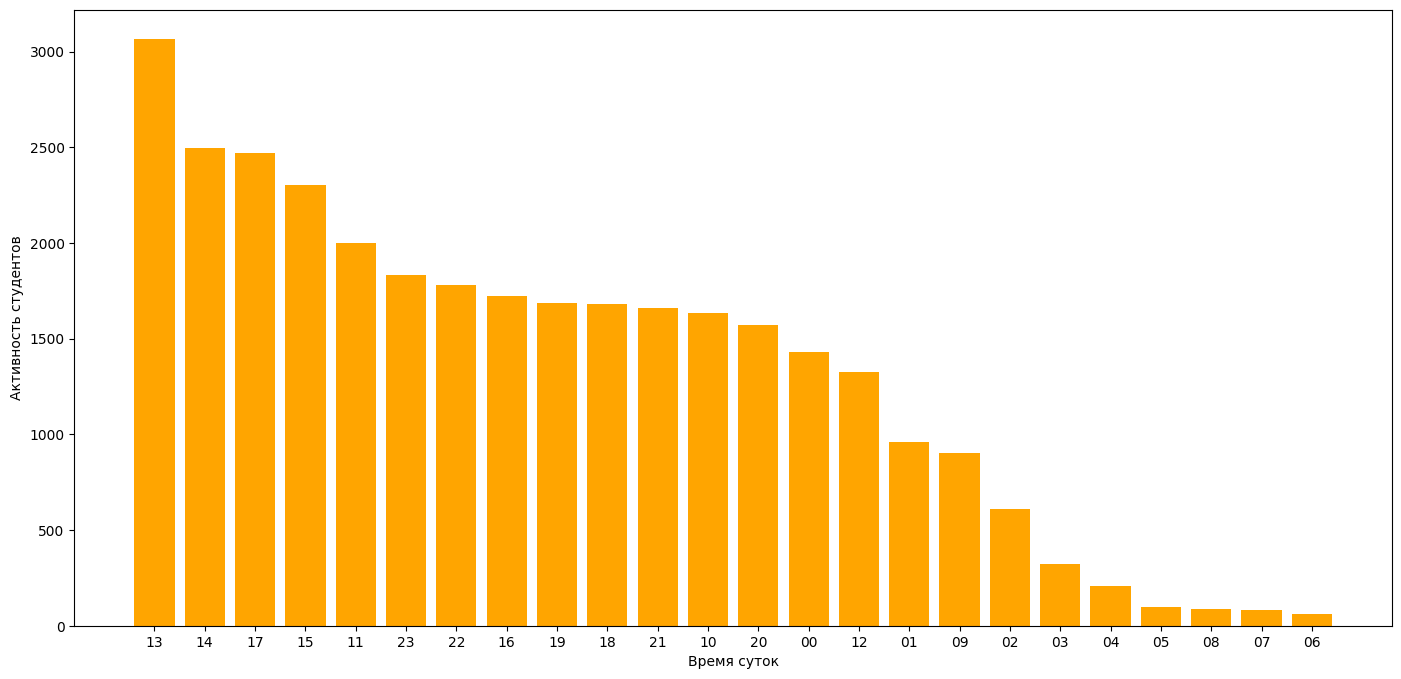

In [56]:
# 4.2
# Как по времени суток распределяется активность студентов?
data = checks["Time"]
data = data.apply(lambda x: x.strftime("%H"))
data = data.value_counts()

plt.figure(figsize=(17, 8))
plt.bar(data.index, data, color ='orange')
plt.ylabel("Активность студентов")
plt.xlabel("Время суток")
plt.show()

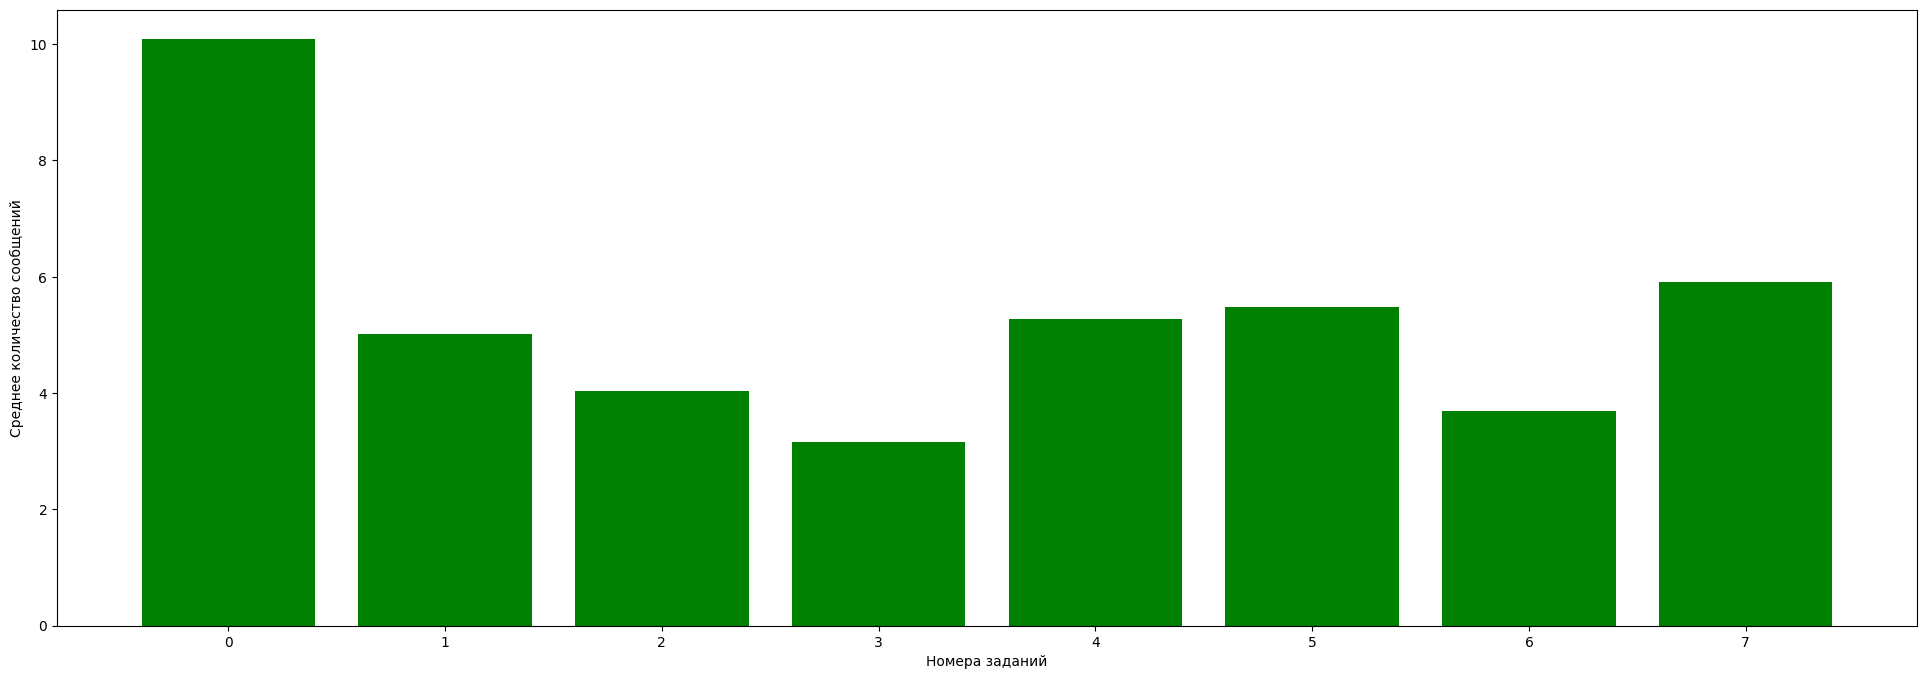

In [57]:
# 4.3
# Сколько сообщений в среднем студенты отправляют по каждой задаче?
# data = messages.groupby('Task').size().div(messages.groupby('Task')['Group'].nunique())
data = messages
data = data.groupby(["Task", "Group", "Variant"])['id'].count().reset_index(name="Count")
data = data.groupby(["Task"])["Count"].mean().reset_index(name="Mean")


plt.figure(figsize=(24, 8))
plt.bar(data["Task"], data["Mean"], color ='green')
plt.ylabel("Среднее количество сообщений")
plt.xlabel("Номера заданий")
plt.show()

<Figure size 2400x800 with 0 Axes>

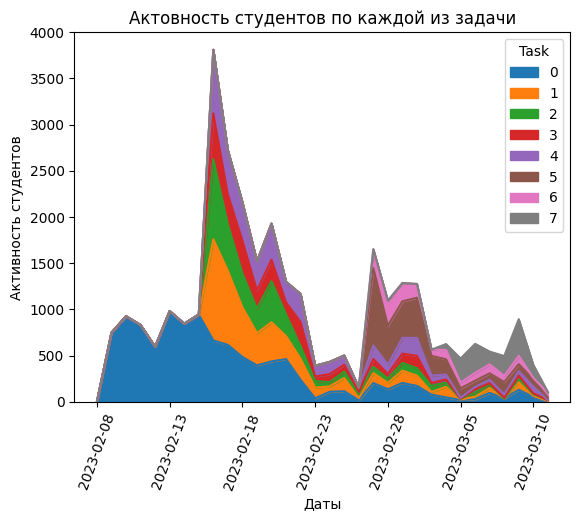

In [58]:
# 4.4
# Как за период с начала семестра менялась активность студентов по каждой из задач?
data = messages.copy()
data["Time"] = data["Time"].map(lambda x: x.strftime("%Y-%m-%d"))
data = data.groupby(["Time", "Task"]).count()["id"].reset_index(name="Count")
data = data.pivot(index="Time", columns="Task", values="Count").fillna(0)

plt.figure(figsize=(24, 8))
ax = data.plot.area(rot=70, xlabel="")
plt.ylabel('Активность студентов')
plt.xlabel('Даты')
plt.title('Актовность студентов по каждой из задачи')
plt.show()


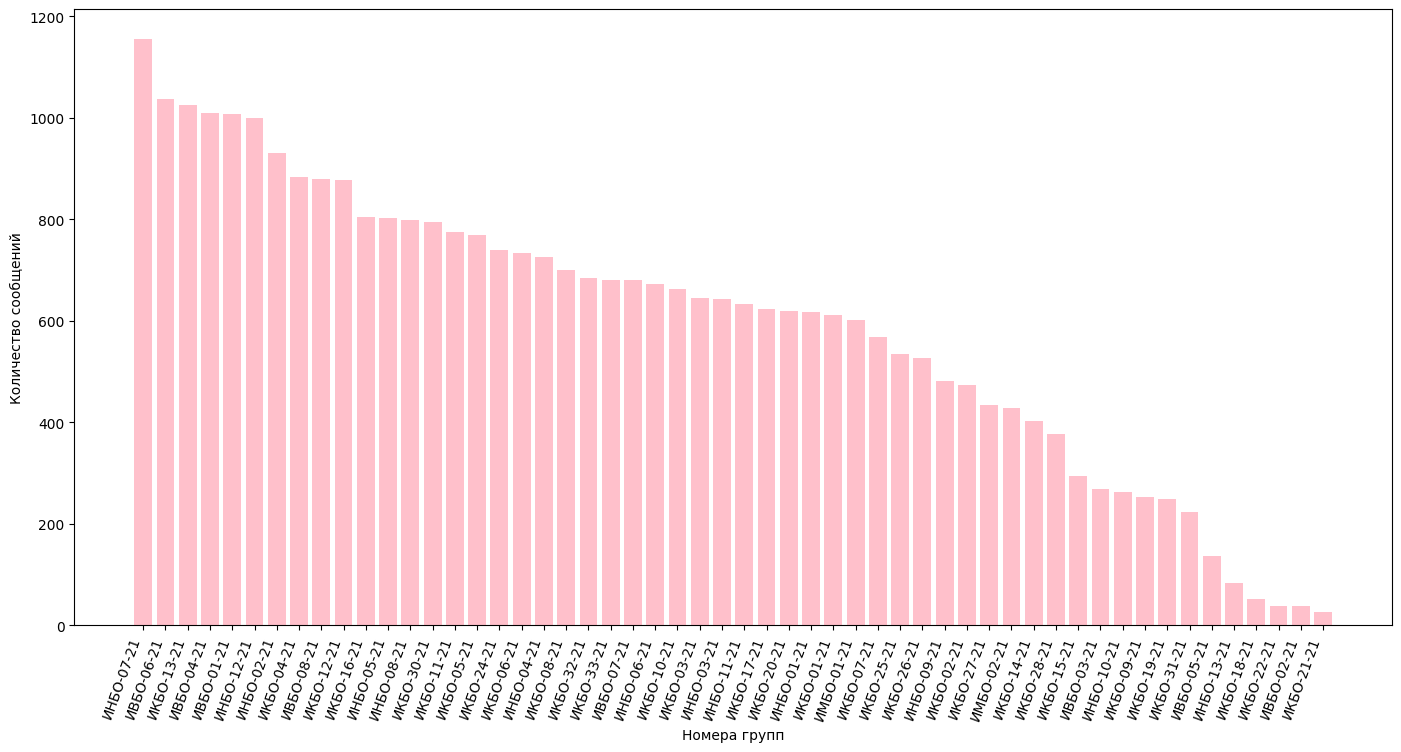

In [59]:
# 4.5
# В каких группах было отправлено больше всего сообщений?
data = messages['Group'].value_counts()

plt.figure(figsize=(17, 8))
plt.bar(data.index, data, color ='pink')
plt.xticks(size=10, rotation=70, ha='right')
plt.ylabel("Количество сообщений")
plt.xlabel("Номера групп")
plt.show()

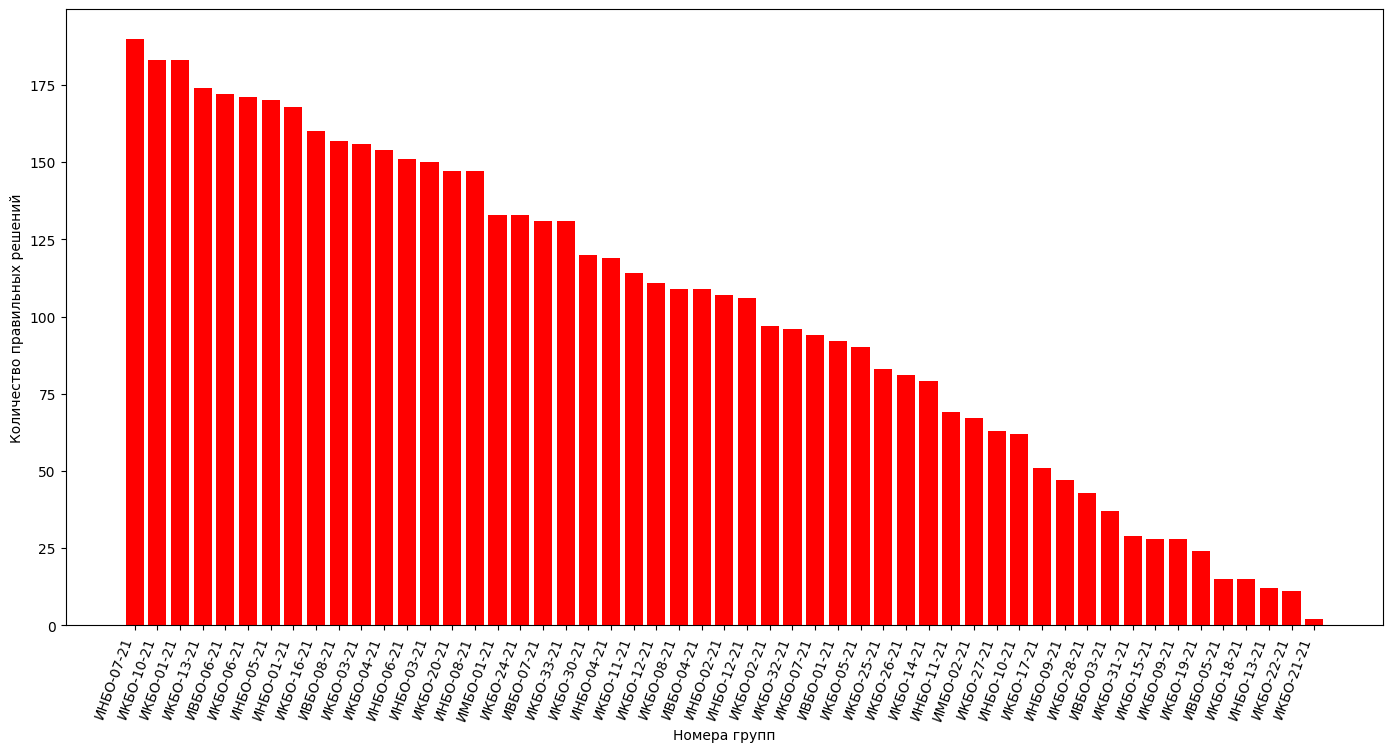

In [60]:
# 4.6
# В каких группах было получено больше всего правильных решений?
data = statuses[statuses["Status"] == 2][["Group", "Status"]].groupby("Group").count()["Status"]
data = data.sort_values(ascending=False)

plt.figure(figsize=(17, 8))
plt.bar(data.index, data, color ='red')
plt.xticks(size=10, rotation=70, ha='right')
plt.ylabel("Количество правильных решений")
plt.xlabel("Номера групп")
plt.show()

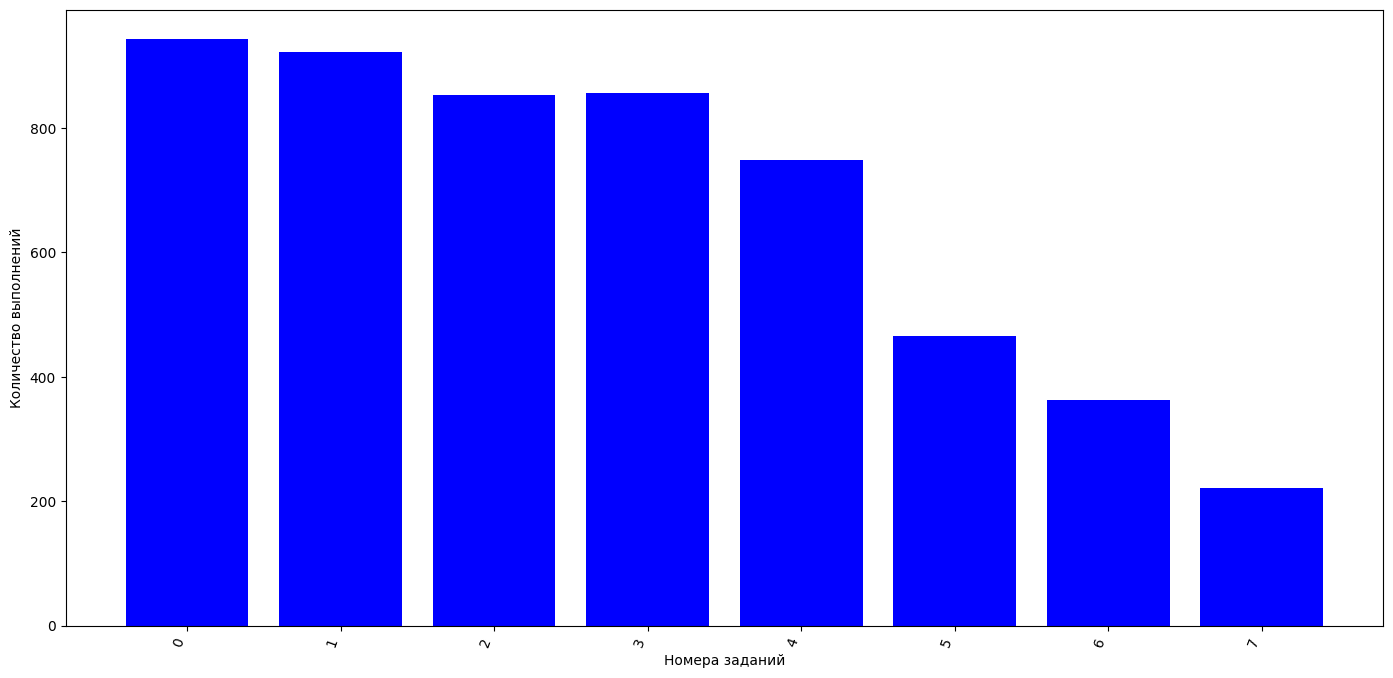

In [61]:
# 4.7
# Какие задачи оказались самыми легкими, самыми сложными?
data = statuses[statuses["Status"] == 2][["Task", "Status"]].groupby("Task").count()["Status"]
data = data.sort_values(ascending=False)

plt.figure(figsize=(17, 8))
plt.bar(data.index, data, color ='blue')
plt.xticks(size=10, rotation=70, ha='right')
plt.ylabel("Количество выполнений")
plt.xlabel("Номера заданий")
plt.show()

C:\Users\kallk\AppData\Local\Temp\ipykernel_14920\51087180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Achievements"] = data["Achievements"].apply(len)


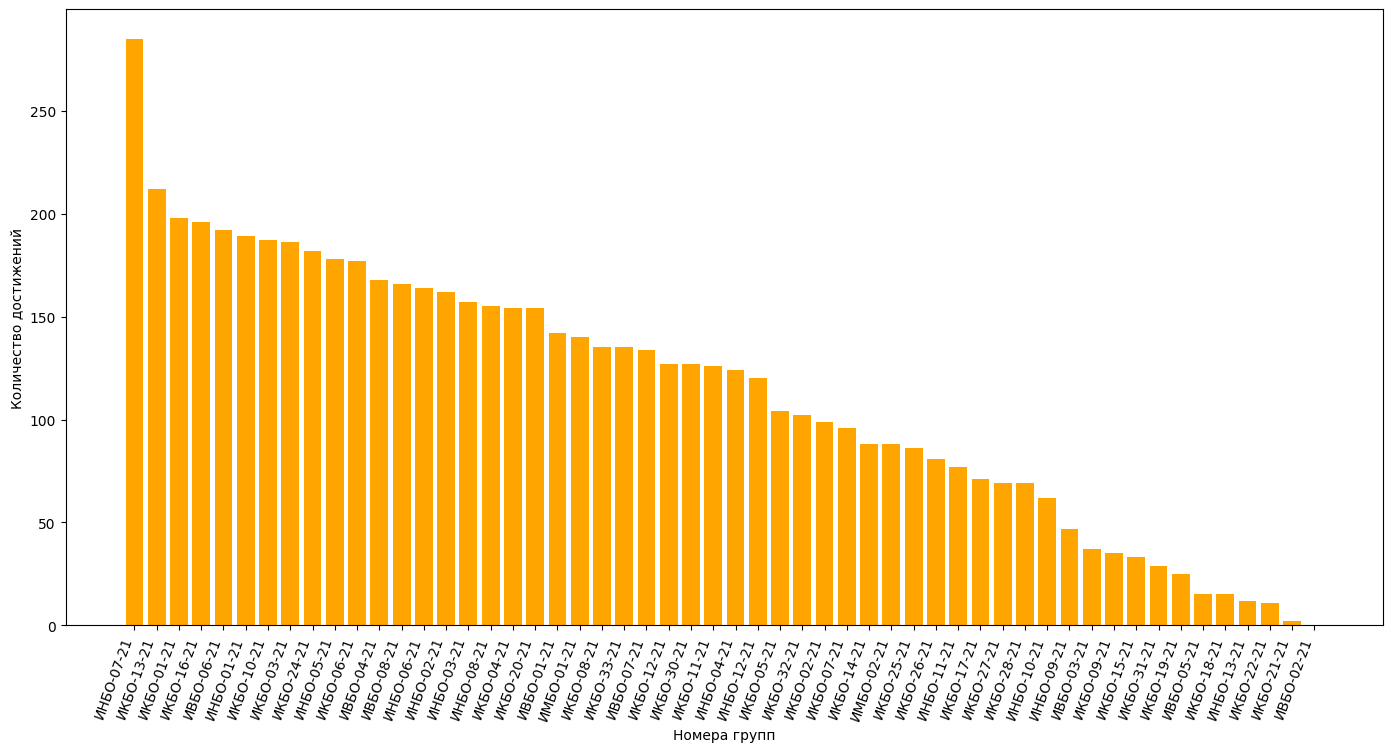

In [62]:
# 4.8
# Студенты каких групп заработали больше всего достижений?
data = statuses[["Group", "Achievements"]]
data["Achievements"] = data["Achievements"].apply(len)
data = data.groupby("Group", as_index=False).sum()
data = data.sort_values(by="Achievements", ascending=False)

plt.figure(figsize=(17, 8))
plt.bar(data["Group"], data["Achievements"], color ='orange')
plt.xticks(size=10, rotation=70, ha='right')
plt.ylabel("Количество достижений")
plt.xlabel("Номера групп")
plt.show()

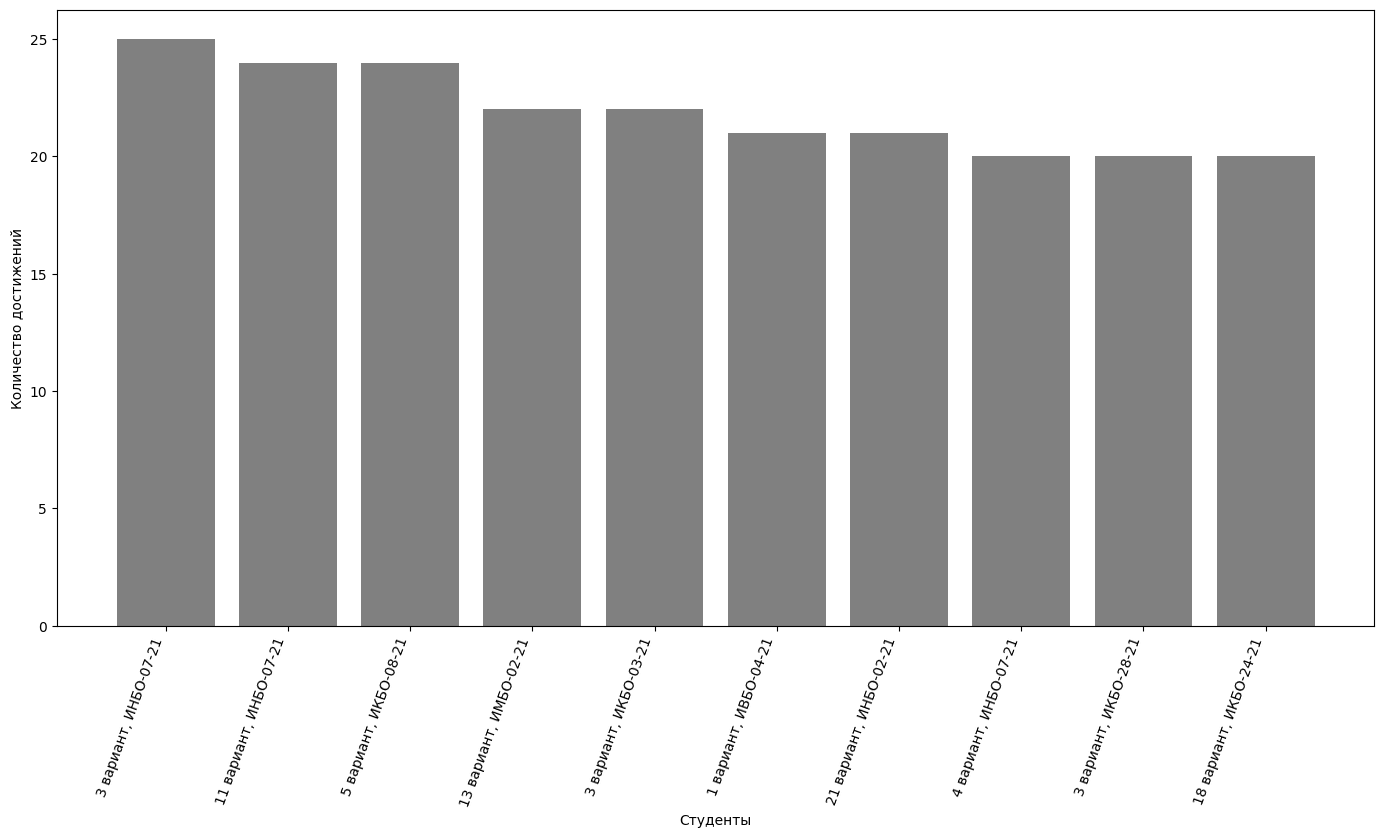

In [63]:
# 4.9
# Кто находится на первых 10 местах в рейтинге студентов?
data = statuses[statuses["Status"] == 2][["Variant", "Group", "Achievements"]]
data["Achievements"] = data['Achievements'].apply(len)
data = data.groupby(["Variant", "Group"], as_index=False).sum()
data = data.sort_values(by="Achievements", ascending=False)
data["Student"] = data["Variant"].map(str) + " вариант, " + data["Group"]
data = data.head(10)

plt.figure(figsize=(17, 8))
plt.bar(data["Student"], data["Achievements"], color ='gray')
plt.xticks(size=10, rotation=70, ha='right')
plt.ylabel("Количество достижений")
plt.xlabel("Студенты")
plt.show()

C:\Users\kallk\AppData\Local\Temp\ipykernel_14920\2618789105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Achievements"] = data["Achievements"].apply(len)


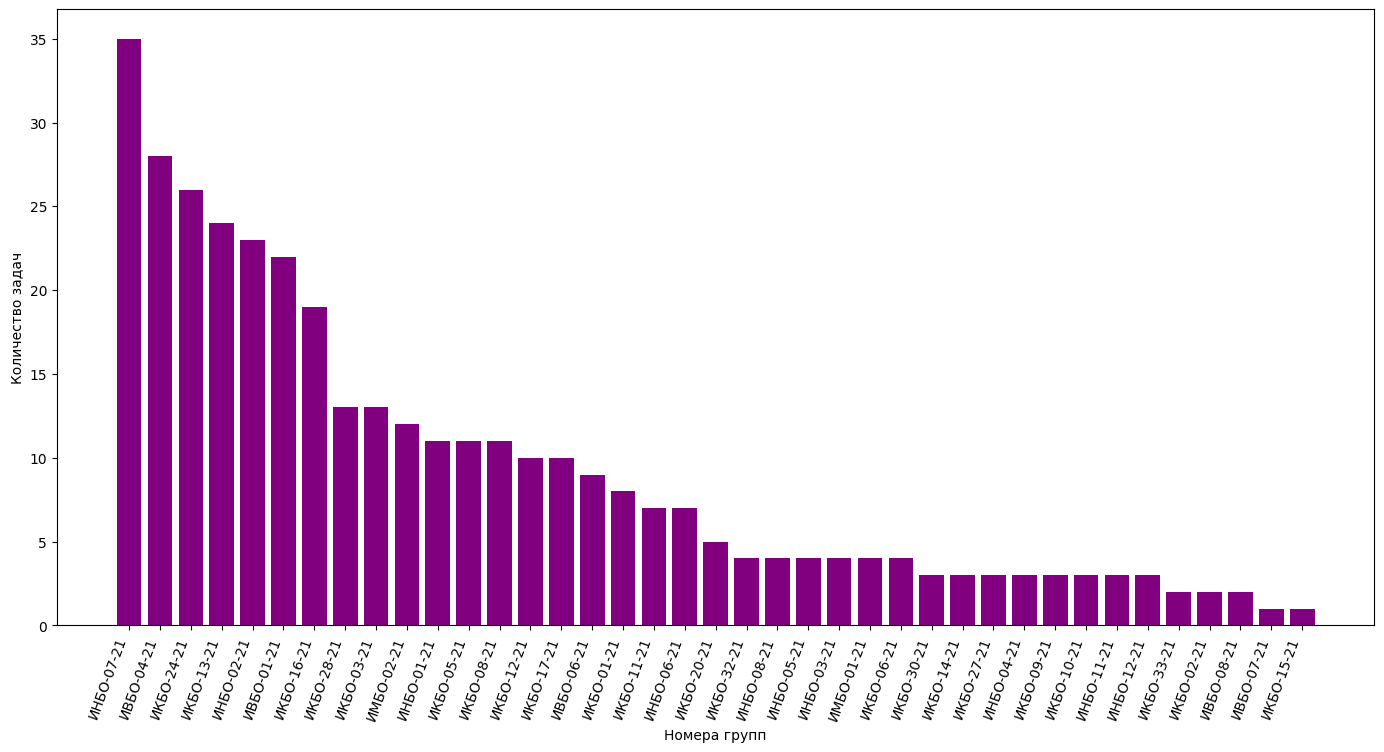

In [64]:
# 4.10
# В каких группах студенты чаще решают задачи различными способами?
data = statuses[["Group", "Achievements"]]
data["Achievements"] = data["Achievements"].apply(len)
data = data[data["Achievements"] > 1]
data = data.groupby("Group")["Achievements"].count()
data = data.sort_values(ascending=False)

plt.figure(figsize=(17, 8))
plt.bar(data.index, data, color ='purple')
plt.xticks(size=10, rotation=70, ha='right')
plt.ylabel("Количество задач")
plt.xlabel("Номера групп")
plt.show()

С помощью графиков ответьте на следующие вопросы.

**4.1.** (0.2 балла)

Как по дням недели распределяется активность студентов?

**4.2.** (0.2 балла)

Как по времени суток распределяется активность студентов?

**4.3.** (0.2 балла)

Сколько сообщений в среднем студенты отправляют по каждой задаче?

**4.4.** (0.3 балла)

Как за период с начала семестра менялась активность студентов по каждой из задач?

**4.5.** (0.2 балла)

В каких группах было отправлено больше всего сообщений?

**4.6.** (0.2 балла)

В каких группах было получено больше всего правильных решений? 

**4.7.** (0.2 балла)

Какие задачи оказались самыми легкими, самыми сложными?

**4.8.** (0.2 балла)

Студенты каких групп заработали больше всего достижений? 

**4.9.** (0.2 балла)

Кто находится на первых 10 местах в рейтинге студентов?

**4.10.** (0.2 балла)

В каких группах студенты чаще решают задачи различными способами?


***Распределение сложных задач:***

**Задача 2:** 2.1. и 2.2. - итого 0.6 балла.

**Задача 3:** с 3.1. по 3.4. - итого 1.5 балла.

**Задача 4:** с 4.1. по 4.10. - итого 2.1 балла.